# Programming Assignment - 8
---
## Name: Aaron Vo
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from skimage import io, transform

import os

## Question 1
---
Implement the multiplicative NMF algorithm discussed in class. Write a function lee_seung(V, k, maxiteration) that takes a nonnegative matrix V and returns W and H.  For test, create a random nonnegative matrix of dimension 200x500 where the elements are uniformly distributed in [0,1]. Print the value $ \|V-WH\|_F /\|V\|_F$.

In [2]:
def lee_seung(V, k, maxIter):
    m,n = V.shape
    W = np.random.rand(V.shape[0], k)
    H = np.random.rand(k, V.shape[1])
    for iter in range(maxIter):
        # Update H
        H = H * (W.T @ V) / (W.T @ W @ H + 1e-9)
        
        # Update W
        W = W * (V @ H.T) / (W @ H @ H.T + 1e-9)
    
    return W, H

# test your code
V = np.random.rand(200, 500)

# Compute NMF with k=20 and maxiteration=1000
W, H = lee_seung(V, k=20, maxIter=1000)

# Compute approximation error
error = np.linalg.norm(V - W @ H) / np.linalg.norm(V)

print("Approximation error:", error)

Approximation error: 0.44640628202031823


## Question 2
---
Find the nonnegative basis representation of images from one of the following databases. Show a comparison of some sample images with their reconstruction from the basis.

>- The ORL database of faces at [ORL link](http://cam-orl.co.uk/facedatabase.html/#:~:text=Our%20Database%20of%20Faces%2C%20%28formerly%20%27The%20ORL%20Database,Robotics%20Group%20of%20the%20Cambridge%20University%20Engineering%20Department.).

>- The CBCL database of faces at [MIT link](http://cbcl.mit.edu/software-datasets/heisele/facerecognition-database.html).

>- Yale faces B facial images at [UCSD](http://vision.ucsd.edu/~leekc/ExtYaleDatabase/ExtYaleB.html).

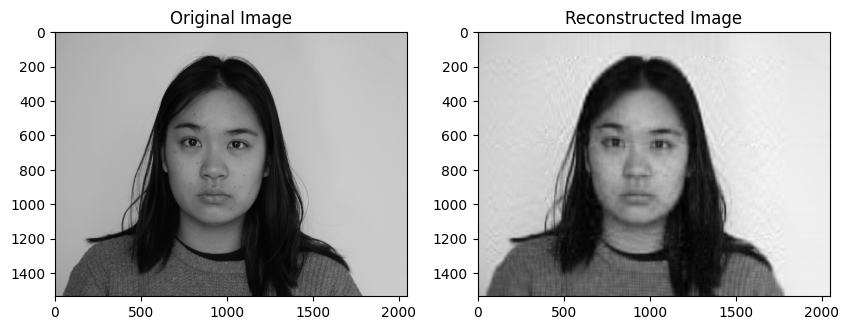

In [9]:
image = plt.imread('testing.jpg')
image = image.mean(axis=2)

# Convert the pixel values to a 2D array of shape (length*width, 3)
vmax = max(image.max(), -image.min())

model = NMF(n_components=50, init='random', tol=5e-3)
W = model.fit_transform(image)
H = model.components_

new_img = np.dot(W,H)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original Image")
ax[1].imshow(new_img, cmap=plt.cm.gray)
ax[1].set_title("Reconstructed Image")
plt.show()
